<a href="https://colab.research.google.com/github/nicklausmillican/ISLR_R/blob/main/ISLR_R_Ch9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 9

## Conceptual

### Question 1

This problem involves hyperplanes in two dimensions.

> (a) Sketch the hyperplane $1 + 3X_1 − X_2 = 0$. Indicate the set of points for which $1 + 3X_1 − X_2 > 0$, as well as the set of points for which $1 + 3X_1 − X_2 < 0$.

> (b) On the same plot, sketch the hyperplane $−2 + X_1 + 2X_2 = 0$. Indicate the set of points for which $−2 + X_1 + 2X_2 > 0$, as well as the set of points for which $−2 + X_1 + 2X_2 < 0$.

#### Answer

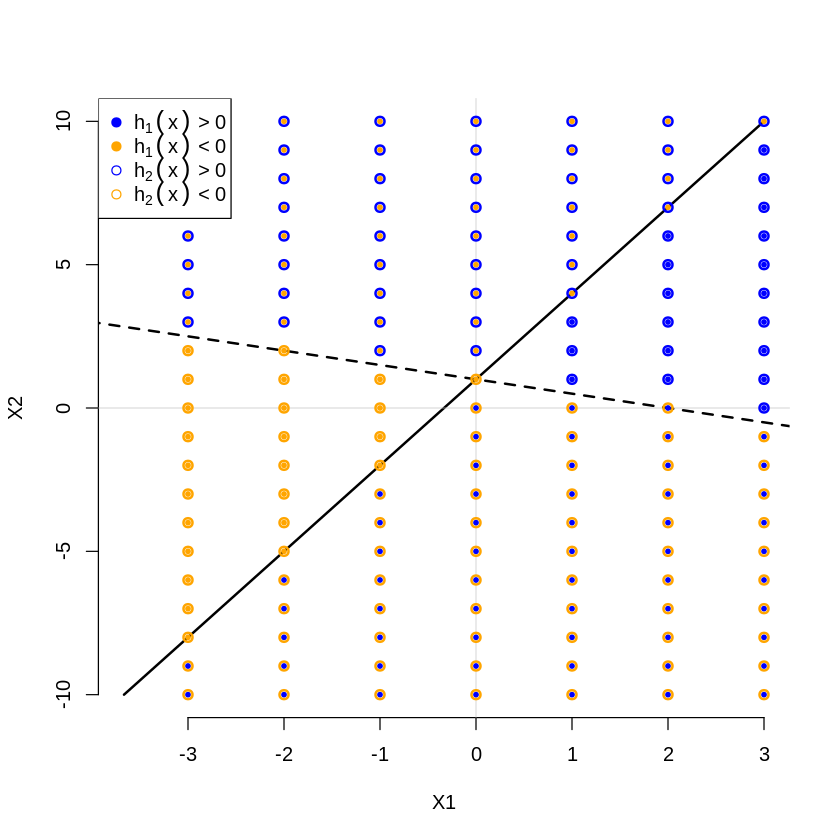

In [ ]:
# Hyperplane 1
hp1_x2 <- seq(-10,10,1)
hp1_x1 <- (hp1_x2-1)/3
hp1 <- 1 + 3*hp1_x1 - hp1_x2
plot(hp1_x2 ~ hp1_x1, type="l", lwd=2, bty="n", col="black", lty=1, xlab="X1", ylab="X2")
abline(h=0, lwd=0.5, col="grey"); abline(v=0, lwd=0.5, col="grey")

# Hyperplane 2
hp2_x1 <- seq(-10,10,1)
hp2_x2 <- (2-hp2_x1)/2
hp2 <- -2 + hp2_x1 + 2*hp2_x2
lines(hp2_x2 ~ hp2_x1, lwd=2, col="black", lty=2)

# Add grid of points
grid.seq <- seq(-10, 10, 1)
G <- expand.grid(x1 = grid.seq, x2 = grid.seq)
G$hp1 <- with(G, 1 + 3 * x1 - x2)
G$hp2 <- with(G, -2 + x1 + 2 * x2)
G$col1 <- ifelse(G$hp1 > 0, "blue", "orange")
G$col2 <- ifelse(G$hp2 > 0, "blue", "orange")

points(G$x1, G$x2,
       pch = 19,
       col = G$col1,
       cex = 0.5)
points(G$x1, G$x2,
       pch = 1,
       col = G$col2,
       cex = 1, lwd=2)

# Legend
legend("topleft",
       legend = c(expression(h[1](x) > 0*phantom(0)),
                  expression(h[1](x) < 0*phantom(0)),
                  expression(h[2](x) > 0*phantom(0)),
                  expression(h[2](x) < 0*phantom(0))),
       pch   = c(19, 19, 1, 1),
       col   = c("blue", "orange", "blue", "orange"),
       bty="o", bg="white")

### Question 2

We have seen that in $p = 2$ dimensions, a linear decision boundary takes the form $β_0 + β_1 X_1 + β_2 X_2 = 0$. We now investigate a non-linear decision boundary.

> (a) Sketch the curve
$$(1 + X_1)^2 + (2 − X_2)^2 = 4$$

> (b) On your sketch, indicate the set of points for which
$$(1 + X_1)^2 + (2 − X_2)^2 > 4$$
as well as the set of points for which
$$(1 + X_1)^2 + (2 − X_2)^2 ≤ 4$$

> (c) Suppose that a classifier assigns an observation to the blue class if
$$(1 + X_1)^2 + (2 − X_2)^2 > 4$$
and to the red class otherwise. To what class is the observation $(0, 0)$ classified? $(−1, 1)$? $(2, 2)$? $(3, 8)$?

> (d) Argue that while the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.

#### Answers to a-c

***Sketch the curve***
$$(1 + X_1)^2 + (2 − X_2)^2 = 4$$

\

***On your sketch, indicate the set of points for which***
$$(1 + X_1)^2 + (2 − X_2)^2 > 4$$
***as well as the set of points for which***
$$(1 + X_1)^2 + (2 − X_2)^2 ≤ 4$$

\

***Suppose that a classifier assigns an observation to the blue class if***
$$(1 + X_1)^2 + (2 − X_2)^2 > 4$$
***and to the red class otherwise. To what class is the observation $(0, 0)$ classified? $(−1, 1)$? $(2, 2)$? $(3, 8)$?***

\

This is a circle
$$(X_1-h)^2 + (X_2-v)^2 = r^2$$
with radius = $r=\sqrt{4}=2$, centered at $(h=-1, v=2)$.  We can plot this like

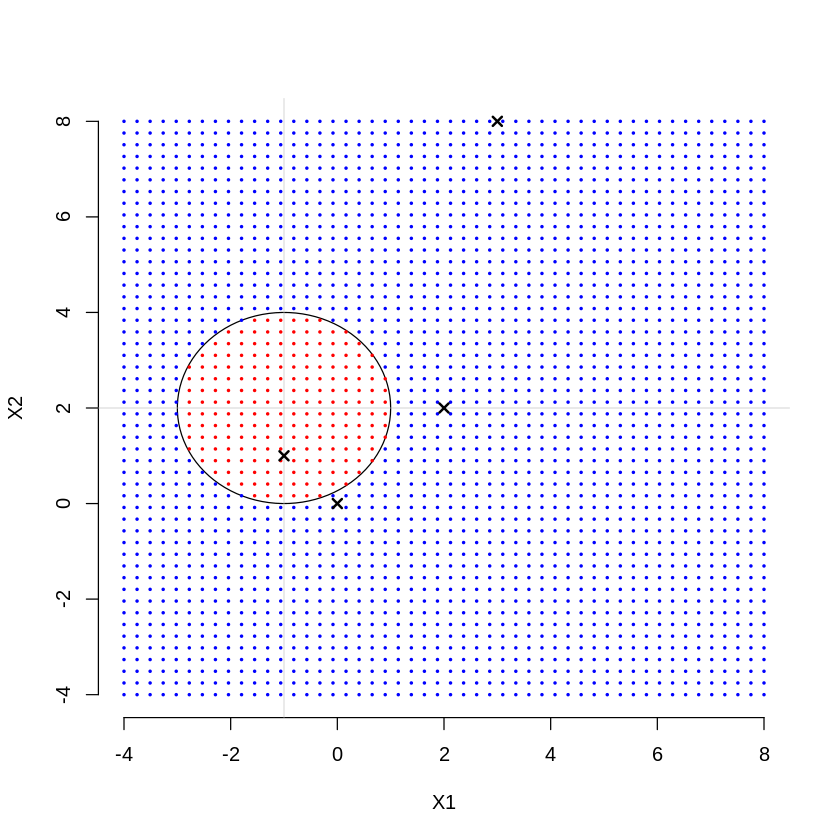

In [ ]:
# Define Circle
theta <- seq(0, 2*pi, length.out=100)
radius <- sqrt(4)
X1 <- -1 + 2*cos(theta)
X2 <- 2 + 2*sin(theta)

# Plot circle
plot(X2 ~ X1, type="l", xlim=c(-4,8), ylim=c(-4,8), bty="n")
abline(v=-1, lwd=0.5, col="grey"); abline(h=2, lwd=0.5, col="grey")

# Grid of points
grid.seq <- seq(from=-4, to=8, length.out=50)
G <- expand.grid(x1 = grid.seq, x2 = grid.seq)
G$col <- ifelse((1+G$x1)^2 + (2-G$x2)^2 > 4, "blue", "red")


points(G$x2 ~ G$x1,
       pch = 19,
       cex = 0.25,
       col=G$col)

points(0,0, pch=4, lwd=2)
points(-1,1, pch=4, lwd=2)
points(2,2, pch=4, lwd=2)
points(3,8, pch=4, lwd=2)

#### Answer to d

***Argue that while the decision boundary in (c) is not linear in terms of $X_1$ and $X_2$, it is linear in terms of $X_1$, $X_1^2$, $X_2$, and $X_2^2$.***

Let us expand the inital expression:

$$\begin{align}
(1 + X_1)^2 + (2 − X_2)^2 = 4 \\
= (1+X_1)(1+X_1) + (2-X_2)(2-X_2) = 4 \\
= (1+2X_1+X_1^2)+(4-4X_2+X_2^2)=4 \\
= 5 + 2X_1 - 4X_2 + X_1^2 + X_2^2 = 4 \\
= 1 + 2X_1 - 4X_2 + X_1^2 + X_2^2 = 0 \\
\end{align}$$

Is this linear?  To determine, we need a definition for "linear".  Here, linear does NOT refer to a straight line.  Instead, it refers to a function comprised purely from addition...which entails subtraction (negative addition) and multiplication (adding many times).  Here, our variables are all multipled by some coefficent (1, 2, or 4), and these terms are added together.  So yes, this is linear.